# Calibration

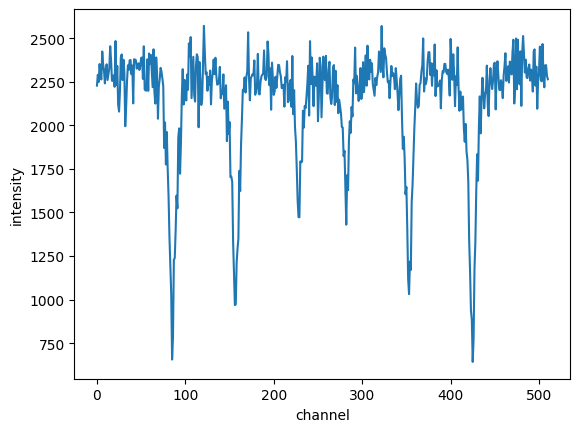

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

intensity_exp = np.loadtxt("Fe_alpha_spectrum.txt")

plt.plot(intensity_exp)
plt.xlabel("channel")
plt.ylabel("intensity")
plt.show()

-0.0002789460284642101
0.9300171305121043
max velocity in experiment: 7.998147322404097


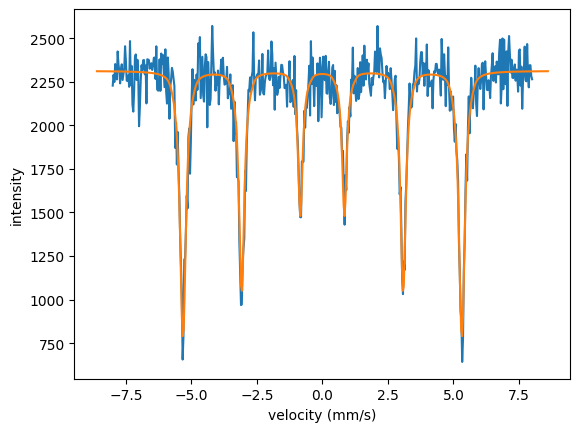

In [2]:
velocities, offset, scaling, vel_theo, int_theo = nx.data.CalibrateChannelsAlphaFe(
  intensity_exp, 8.6, 30e3, Bhf = 33, B_fwhm = 0.3, emission = False, mode = "constant")

print(offset)
print(scaling)
print("max velocity in experiment: {}".format(8.6*scaling))

plt.plot(velocities, intensity_exp)
plt.plot(vel_theo, int_theo)
plt.xlabel("velocity (mm/s)")
plt.ylabel("intensity")
plt.show()

In [3]:
# setup an experiment used for the calibration
dist = nx.lib.distribution.Gaussian(points = 31, 
                                    fwhm = 0.3)
    
site = nx.Hyperfine(magnetic_field = 33,
                    magnetic_field_dist = dist,
                    isotropic = True)
    
mat = nx.Material.Template(nx.lib.material.Fe)
    
mat.hyperfine_sites = [site]
    
layer = nx.Layer(thickness = 30e3,
                 material = mat)
    
sample = nx.Sample(layers = [layer])
    
beam = nx.Beam()
beam.Unpolarized()
    
exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

-0.0003590871932246044
0.9522336993357914
max velocity in experiment: 7.998763074420648


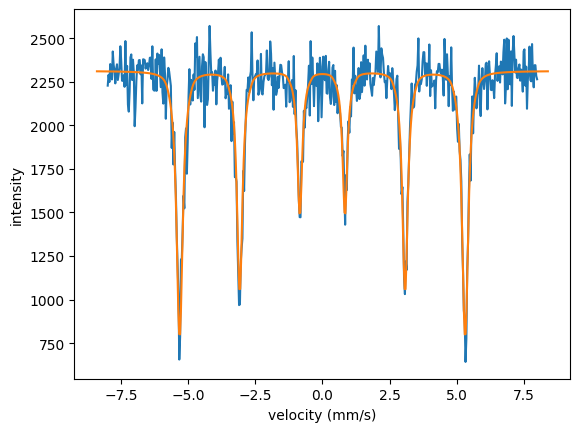

In [4]:
max_vel = 8.4

velocities, offset, scaling, vel_theo, int_theo = nx.data.CalibrateChannelsExperiment(
                                                    intensity = intensity_exp,
                                                    velocity = max_vel,
                                                    experiment = exp,
                                                    emission = False,
                                                    mode = "constant")

print(offset)
print(scaling)
print("max velocity in experiment: {}".format(max_vel *scaling))

plt.plot(velocities, intensity_exp)
plt.plot(vel_theo, int_theo)
plt.xlabel("velocity (mm/s)")
plt.ylabel("intensity")
plt.show()

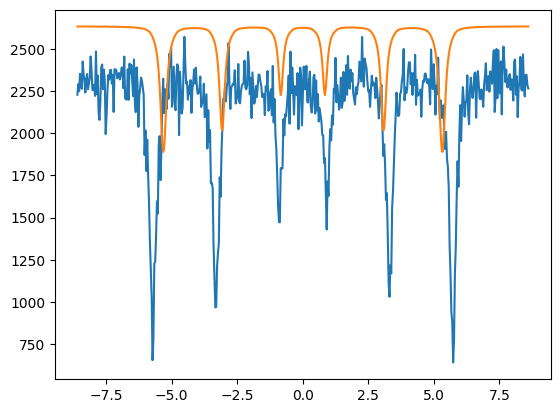

In [5]:
# setup an experiment used for the calibration
dist = nx.lib.distribution.Gaussian(points = 31, 
                                    fwhm = 0.3)
    
site = nx.Hyperfine(magnetic_field = 33,
                    magnetic_field_dist = dist,
                    isotropic = True)
    
mat = nx.Material.Template(nx.lib.material.Fe)
    
mat.hyperfine_sites = [site]
    
layer = nx.Layer(thickness = 30e3,
                 material = mat)
    
sample = nx.Sample(layers = [layer])
    
beam = nx.Beam()
beam.Unpolarized()
    
exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

#assumed maximum detuning is 8.6 mm/s
vel_theory = np.linspace(-8.6, 8.6, len(intensity_exp))

spec = nx.MoessbauerSpectrum(experiment = exp,
                             velocity = vel_theory)
        
spec_theory = spec()

plt.plot(vel_theory, intensity_exp)
plt.plot(vel_theory, spec_theory * 5000 + 1500)
plt.show()
    

-0.000278946036145999
0.952160395346987
max velocity in experiment: 7.998147320914692


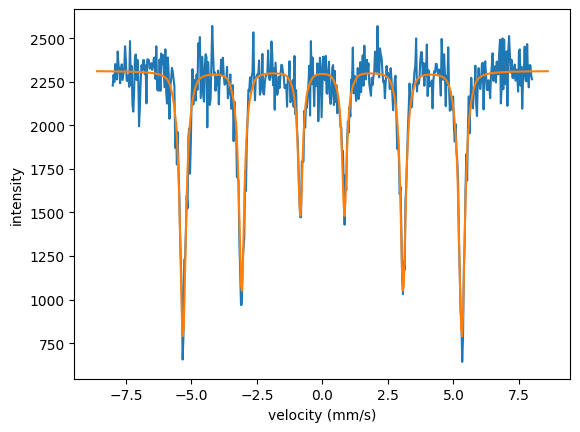

In [6]:
max_vel = 8.4

velocities, offset, scaling, vel_theo, int_theo = nx.data.CalibrateChannels(
                                                    intensity = intensity_exp,
                                                    velocity = max_vel,
                                                    intensity_reference = spec_theory,
                                                    velocity_reference = vel_theory,
                                                    mode = "constant")

print(offset)
print(scaling)
print("max velocity in experiment: {}".format(max_vel *scaling))

plt.plot(velocities, intensity_exp)
plt.plot(vel_theo, int_theo)

plt.xlabel("velocity (mm/s)")
plt.ylabel("intensity")
plt.show()